<a href="https://colab.research.google.com/github/AparnaR06/Computer-networks/blob/main/Face_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3532 - loss: 2.1261 - val_accuracy: 0.1822 - val_loss: 1.9394 - learning_rate: 0.0010
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5754 - loss: 1.2244 - val_accuracy: 0.1822 - val_loss: 1.9502 - learning_rate: 0.0010
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7300 - loss: 0.7944 - val_accuracy: 0.1047 - val_loss: 2.0079 - learning_rate: 0.0010
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7892 - loss: 0.5743 - val_accuracy: 0.1047 - val_loss: 2.0518 - learning_rate: 5.0000e-04
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8806 - loss: 0.3694 - val_accuracy: 0.1047 - val_loss: 2.0904 - learning_rate: 5.0000e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1765 - loss: 1.9393
Test Accuracy: 0.18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


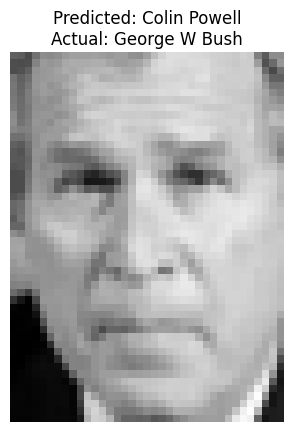

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Load dataset
lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_data.images
y = lfw_data.target
target_names = lfw_data.target_names
n_classes = len(target_names)

# Step 2: Preprocessing
X = X.reshape(-1, X.shape[1], X.shape[2], 1) / 255.0
y = to_categorical(y, n_classes)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Step 5: Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

# Step 7: Training
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])

# Step 8: Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Step 9: Prediction function
def predict_and_display(index):
    sample = X_test[index].reshape(1, X.shape[1], X.shape[2], 1)
    prediction = model.predict(sample)
    predicted_label = target_names[np.argmax(prediction)]
    actual_label = target_names[np.argmax(y_test[index])]
    plt.imshow(X_test[index].reshape(X.shape[1], X.shape[2]), cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()

# Example: Show prediction
predict_and_display(0)

# ✅ Step 10: Save model in modern format (.keras)
model.save("lfw_cnn_model_improved.keras")
